# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

In [2]:
ames_log = ames[continuous].apply(lambda x: np.log(x))

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
ss = StandardScaler()
log_std = pd.DataFrame(ss.fit_transform(ames_log), columns = ames_log.columns)

In [5]:
log_std.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,-0.133231,-0.803570,0.529260,0.560068
1,0.113442,0.418585,-0.381846,0.212764
2,0.420061,-0.576560,0.659675,0.734046
3,0.103347,-0.439287,0.541511,-0.437382
4,0.878409,0.112267,1.282191,1.014651


## Categorical Features

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
ohe = OneHotEncoder(drop='first', sparse=False)

In [8]:
ohe.get_feature_names

<bound method OneHotEncoder.get_feature_names of OneHotEncoder(categorical_features=None, categories=None, drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)>

In [9]:
ohe_df = pd.DataFrame(ohe.fit_transform(ames[categoricals]), columns = ohe.get_feature_names())

In [10]:
ohe_df.head()

,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,x1_TA,x2_CWD,x2_Con,x2_ConLD,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Combine Categorical and Continuous Features

In [11]:
# combine features into a single dataframe called preprocessed
preprocessed = log_std.join(ohe_df)
preprocessed.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,-0.133231,-0.803570,0.529260,0.560068,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.113442,0.418585,-0.381846,0.212764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.420061,-0.576560,0.659675,0.734046,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.103347,-0.439287,0.541511,-0.437382,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.878409,0.112267,1.282191,1.014651,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Run a linear model with SalePrice as the target variable in statsmodels

In [12]:
import statsmodels.api as sm

X = preprocessed.drop(columns = 'SalePrice')
y = preprocessed['SalePrice']
X_intercept = sm.add_constant(X)

model = sm.OLS(y,X_intercept).fit()
model.summary()

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:29:04   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea        0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF       0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea      0.3768      0.016     24.114      0.000       0.346       0.407
x0_2fmCon     -0.1715      0.079     -2.173      0.030      -0.326      -0.017
x0_Duplex     -0.4205      0.062     -6.813      0.000      -0.542      -0.299
x0_Twnhs      -0.1404      0.093     -1.513      0.130      -0.322       0.042
x0_TwnhsE     -0.0512      0.060     -0.858      0.391      -0.168       0.066
x1_Fa         -1.0002      0.088    -11.315      0.000      -1.174      -0.827
x1_Gd         -0.3822      0.050     -7.613      0.000      -0.481      -0.284
x1_TA         -0.6695      0.055    -12.111      0.000      -0.778      -0.561
x2_CWD         0.2286      0.215      1.061      0.289      -0.194       0.651
x2_Con         0.5863      0.304      1.927      0.054      -0.010       1.183
x2_ConLD       0.3152      0.155      2.029      0.043       0.010       0.620
x2_ConLI       0.0331      0.195      0.169      0.865      -0.350       0.416
x2_ConLw       0.0161      0.196      0.082      0.935      -0.368       0.400
x2_New         0.3000      0.079      3.803      0.000       0.145       0.455
x2_Oth         0.1179      0.246      0.480      0.631      -0.364       0.599
x2_WD          0.1749      0.065      2.676      0.008       0.047       0.303
x3_FV          1.0670      0.193      5.526      0.000       0.688       1.446
x3_RH          0.8771      0.194      4.512      0.000       0.496       1.258
x3_RL          0.9964      0.162      6.151      0.000       0.679       1.314
x3_RM          1.1027      0.152      7.264      0.000       0.805       1.400
x4_Pave       -0.2132      0.180     -1.182      0.237      -0.567       0.141
x5_Blueste     0.0530      0.318      0.167      0.868      -0.571       0.677
x5_BrDale     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
x5_BrkSide    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
x5_ClearCr    -0.2103      0.144     -1.456      0.146      -0.494       0.073
x5_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
x5_Crawfor    -0.0824      0.129     -0.638      0.523      -0.336       0.171
x5_Edwards    -0.7615      0.124     -6.143      0.000      -1.005      -0.518
x5_Gilbert    -0.0980      0.126     -0.777      0.437      -0.346       0.150
x5_IDOTRR     -0.9622      0.160     -6.014      0.000      -1.276      -0.648
x5_MeadowV    -0.6921      0.159     -4.351      0.000      -1.004      -0.380
x5_Mitchel    -0.2554      0.131     -1.944      0.052      -0.513       0.002
x5_NAmes      -0.4408      0.120     -3.664      0.000      -0.677      -0.205
x5

## Run the same model in scikit-learn

In [13]:
# Check that the coefficients and intercept are the same as those from Statsmodels

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# coefficients
linreg.coef_

array([ 0.10327192,  0.1371289 ,  0.37682133, -0.17152105, -0.42048287,
       -0.14038921, -0.05121949, -1.00020261, -0.38215288, -0.6694784 ,
        0.22855565,  0.58627941,  0.31521364,  0.03310544,  0.01609215,
        0.29995612,  0.1178827 ,  0.17486316,  1.06700108,  0.8771105 ,
        0.99643261,  1.10266268, -0.21318409,  0.0529509 , -0.46287108,
       -0.65004527, -0.21026441, -0.0761186 , -0.08236455, -0.76152767,
       -0.09803299, -0.96216285, -0.6920628 , -0.25540919, -0.4408245 ,
       -0.01595592, -0.26772132,  0.36325607,  0.36272091, -0.93537011,
       -0.70000301, -0.47559431, -0.23317719,  0.09506225,  0.42971796,
        0.00569435,  0.12766986])

In [15]:
# intercept
linreg.intercept_

-0.1317424941874434

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [16]:
continuous

['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [17]:
cont_test = pd.DataFrame({'LotArea': [14977],
                          '1stFlrSF': [1976],
                          'GrLivArea': [1976],
                          'SalePrice':[0.1] #cannot take log on zero
    
})
cont_test

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,14977,1976,1976,0.1


In [18]:
log_test = cont_test.apply(lambda x: np.log(x))
log_test

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,9.614271,7.58883,7.58883,-2.302585


In [19]:
cont_test = pd.DataFrame(ss.transform(log_test), columns = log_test.columns)
cont_test

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,0.973248,1.830257,0.962869,-35.878027


In [20]:
cont_test.drop(columns = 'SalePrice', inplace=True)
cont_test

,LotArea,1stFlrSF,GrLivArea
0,0.973248,1.830257,0.962869


In [21]:
cat_df = pd.DataFrame({'BldgType': ['1Fam'],
                       'KitchenQual': ['Gd'],
                       'SaleType': ['New'],
                       'MSZoning': ['RL'],
                       'Street': ['Pave'],
                       'Neighborhood': ['NridgHt']   
})
cat_df

,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,1Fam,Gd,New,RL,Pave,NridgHt


In [22]:
cat_ohe = pd.DataFrame(ohe.transform(cat_df), columns = ohe.get_feature_names())

In [23]:
test_df = cont_test.join(cat_ohe)
test_df.head()

,LotArea,1stFlrSF,GrLivArea,x0_2fmCon,x0_Duplex,x0_Twnhs,x0_TwnhsE,x1_Fa,x1_Gd,x1_TA,...,x5_NoRidge,x5_NridgHt,x5_OldTown,x5_SWISU,x5_Sawyer,x5_SawyerW,x5_Somerst,x5_StoneBr,x5_Timber,x5_Veenker
0,0.973248,1.830257,0.962869,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X.shape

(1460, 47)

In [25]:
pred = linreg.predict(test_df)

In [26]:
my_pred = np.exp((pred * ames_log['SalePrice'].std()) + ames_log['SalePrice'].mean())
my_pred

array([321800.9761093])

Text(0, 0.5, 'Price Prediciton')

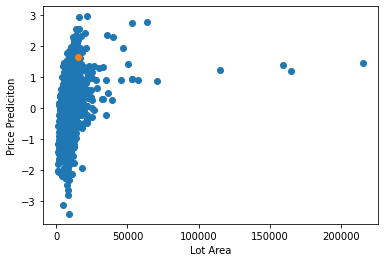

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(ames['LotArea'], linreg.predict(X))
plt.scatter(14977,pred[0])
plt.xlabel('Lot Area')
plt.ylabel('Price Prediciton')

Text(0, 0.5, 'Price Prediciton')

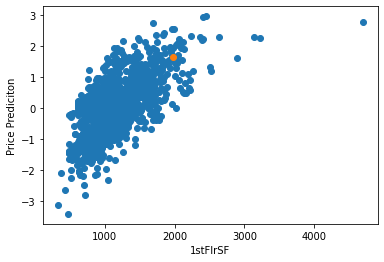

In [28]:
plt.scatter(ames['1stFlrSF'], linreg.predict(X))
plt.scatter(1976,pred[0])
plt.xlabel('1stFlrSF')
plt.ylabel('Price Prediciton')

Text(0, 0.5, 'Price Prediciton')

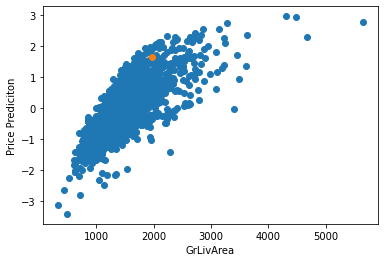

In [29]:
plt.scatter(ames['GrLivArea'], linreg.predict(X))
plt.scatter(1976,pred[0])
plt.xlabel('GrLivArea')
plt.ylabel('Price Prediciton')

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!